In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
cleaned_dataset = pd.read_csv('../preparation/dataframes/cleaned_dataset.csv', index_col=0)
X = cleaned_dataset.drop('outcome', axis=1)
y = cleaned_dataset['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [20]:
estimators_scores_list = []
for i in range(1, 50):
    model = GradientBoostingClassifier(n_estimators=i, max_depth=5, random_state=13)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    estimators_scores_list.append(accuracy_score(y_test, y_pred))

In [21]:
px.line(
    x=range(1, 50),
    y=estimators_scores_list,
    labels={'x': 'No. estimators', 'y': 'Testing accuracy'},
    title='The accuracy score of the Gradient Boosting Classifier as the no. estimators is varied')

In [13]:
max_depth_scores_list = []
for i in range(1, 10):
    model = GradientBoostingClassifier(n_estimators=20, max_depth=i, random_state=13)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    max_depth_scores_list.append(accuracy_score(y_test, y_pred))

In [19]:
px.line(
    x=range(1, 10),
    y=max_depth_scores_list,
    labels={'x': 'Maximum depth', 'y': 'Testing accuracy'},
    title='The accuracy score of the Gradient Boosting Classifier as the maximum depth is varied')

In [17]:
learning_rate_scores_list = []
for i in np.arange(0.1, 3, 0.1):
    model = GradientBoostingClassifier(n_estimators=10, max_depth=5, learning_rate=i, random_state=13)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    learning_rate_scores_list.append(accuracy_score(y_test, y_pred))

In [18]:
px.line(
    x=np.arange(0.1, 3, 0.1),
    y=learning_rate_scores_list,
    labels={'x': 'Learning rate', 'y': 'Testing accuracy'},
    title='The accuracy score of the Gradient Boosting Classifier as the learning rate is varied')

In [23]:
n_estimators = list(range(30, 41))
max_depth = list(range(4, 9))
learning_rate = np.arange(0, 1.1, 0.1)
hyperparameters = dict(
    n_estimators=n_estimators,
    max_depth=max_depth,
    learning_rate=learning_rate)

decision_tree = GradientBoostingClassifier(random_state=13)
kfold = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(decision_tree, hyperparameters, cv=kfold)
best_model = clf.fit(X, y)

print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best learning_rate:', best_model.best_estimator_.get_params()['learning_rate'])

/Users/asadiceccarelli/opt/anaconda3/envs/football-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


275 fits failed out of a total of 3025.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
275 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/asadiceccarelli/opt/anaconda3/envs/football-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/asadiceccarelli/opt/anaconda3/envs/football-env/lib/python3.10/site-packages/sklearn/ensemble/_gb.py", line 577, in fit
    self._check_params()
  File "/Users/asadiceccarelli/opt/anaconda3/envs/football-env/

Best n_estimators: 32
Best max_depth: 4
Best learning_rate: 0.2


## Best Model

In [9]:
model = GradientBoostingClassifier(
    n_estimators=32,
    max_depth=4,
    learning_rate=0.2,
    random_state=13)

model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
print(f'Best Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Best Precision: {precision_score(y_test, y_pred, average="macro")}')
print(f'Best Recall: {recall_score(y_test, y_pred, average="macro")}')
print(f'Best F1: {f1_score(y_test, y_pred, average="macro")}')

Best Accuracy: 0.49604013766223
Best Precision: 0.43626290377299215
Best Recall: 0.39551777724711074
Best F1: 0.3358411810852316


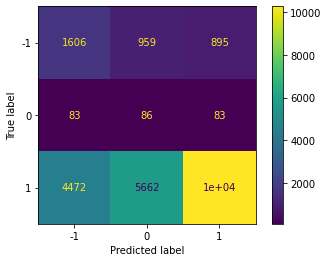

In [11]:
cm = confusion_matrix(y_pred, y_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()
plt.show()